## Assignment 1 

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )




 
  
 

## Learning outcomes

- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 


**Question**

1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:

    - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 
    - What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.
    - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python. 
- Label the graphs wherever applicable e.g, title, legend, units etc.



In [1]:
#your work here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('mosquitos_data.csv')

In [3]:
df.head(5)

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


In [4]:
df.tail(5)

,Response,Treatment
38,22,Water
39,20,Water
40,24,Water
41,18,Water
42,20,Water


In [5]:
df.groupby(df['Treatment']).count()

,Response
Treatment,
Beer,25
Water,18


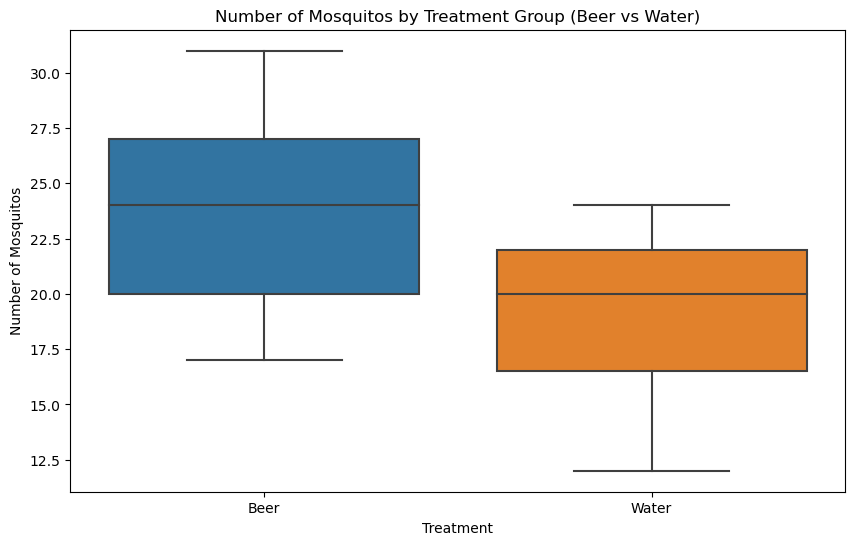

In [6]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Treatment', y='Response', data=df)  # You can choose other color palettes
plt.title('Number of Mosquitos by Treatment Group (Beer vs Water)')
plt.xlabel('Treatment')
plt.ylabel('Number of Mosquitos')
plt.show()

We can clearly see from the boxplot that the median number of mosquitos in the Beer group is higher than in the Water group, and the interquartile range of the Beer group is slightly wider, indicating more variability. There also appear to be higher maximum values for the Beer group.

In [7]:
beer_group = df[df['Treatment'] == 'Beer']['Response']
water_group = df[df['Treatment']=='Water']['Response']
beer_stats ={
    'Mean':beer_group.mean(),
    'Median':beer_group.median(),
    'Standard deviation':beer_group.std()
}
water_stats ={
    'Mean':water_group.mean(),
    'Median':water_group.median(),
    'Standard deviation':water_group.std()
}
print("Beer Group Statistics: ", beer_stats)
print("Water Group Statistics: ", water_stats)

Beer Group Statistics:  {'Mean': 23.6, 'Median': 24.0, 'Standard deviation': 4.133198922545748}
Water Group Statistics:  {'Mean': 19.22222222222222, 'Median': 20.0, 'Standard deviation': 3.6711202899124045}


- Beer group has a higher mean and median compared to the Water group, indicating that, on average, more mosquitos are attracted when beer is consumed. 
- The higher standard deviation in the Beer group suggests more variability in the response. Based on this, there seems to be an association between beer consumption and increased attractiveness to mosquitos.
- 68% of the results for the Beer group occur between 1 std of the mean, roughly between the values of 19.46 - 27.73
- 68% of the results for the Water group occur between 1 std of the mean, roughly between the values of 15.55 - 22.89

## Simulation experiment with Null Hypothesis assumption

In [8]:
#Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption
mosquitos_data = pd.read_csv('mosquitos_data.csv')

# Separating the original beer and water samples from the dataset and putting into two arrays named beer_sample, water_sample
beer_sample = mosquitos_data[mosquitos_data['Treatment'] == 'Beer']['Response'].values[:25]
water_sample = mosquitos_data[mosquitos_data['Treatment'] == 'Water']['Response'].values[:18]

# Concatenating the two arrays to form a combined array for shuffling to obtain new samples afterwards
combined = np.concatenate((beer_sample, water_sample))

# Given observed difference 
observed_diff = 4.4

# Number of simulations
n_simulations = 10000

# counter initialized for counting simulations with difference more than given observed_diff
count = 0

# Performing the permutation test
for _ in range(n_simulations): 
    # Shuffle the combined array
    np.random.shuffle(combined)     
    # Combined array Split into two new treatment groups after shuffling
    new_beer_sample = combined[:25]
    new_water_sample = combined[25:43]
    
    # Calculate the difference in means of new treatment groups, rounded to one decimal place
    diff_means = round(np.mean(new_beer_sample) - np.mean(new_water_sample), 1)
    
    # Count if the difference is greater than or equal to the observed difference
    if abs(diff_means) >= observed_diff:
        count += 1

# Calculate the probability
prob = count / n_simulations

print("Probability of obtaining the observed difference by chance is:", prob)


Probability of obtaining the observed difference by chance is: 0.0006


-  Here, p-value is much smaller than 0.05, which is a common threshold for statistical significance. Hence, I would reject the null hypothesis, as this result supports the hypothesis that beer makes individuals more attractive to mosquitos, with a very low likelihood that the observed effect happened by random chance alone. 
